# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt



# Loading the dataset

In [2]:
A=pd.read_csv("C:/Users/abhijeet/Documents/Attirition data.2.csv")

In [3]:
A.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
A.shape

(1470, 35)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#A.describe()

In [7]:
#A.head()

# Data preprosseing and EDA

In [8]:
cat=[]
con=[]
for i in A.columns:
    if (A[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
con_A=[['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
 'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']]

In [12]:
cat_A=[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]

In [13]:
# Identifying the Categorical features
cat_data = A.select_dtypes(include=['object'])
cat_col = A.columns
print(cat_data.head())

  Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No  


# checking correletion using heatmap

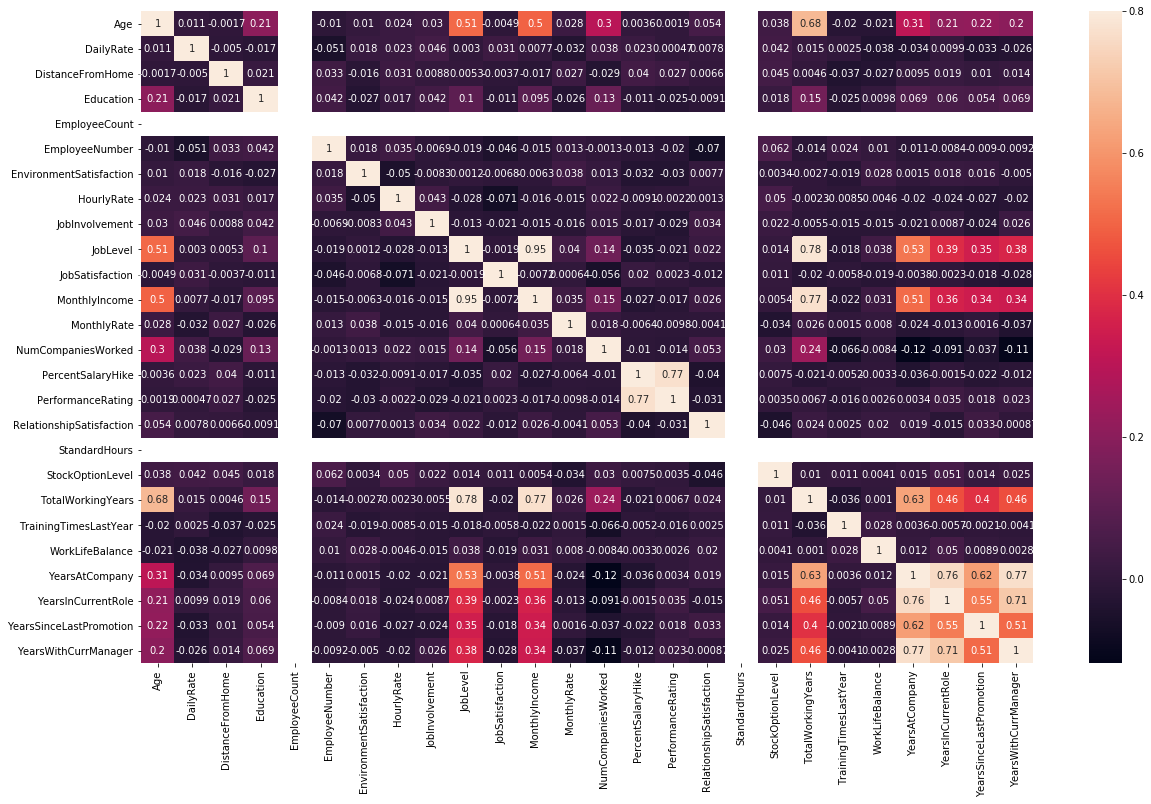

In [14]:
import matplotlib.pyplot as plt
corr_heatmap=A.corr()
f,ax=plt.subplots(figsize=(20,12))
sb.heatmap(corr_heatmap,vmax=0.8,annot=True)

Insights:

1- We remove the columbs which is more than 0.7 with the refrence of p values of that columbs. 
2- P values is less to comparing the two columbs.
3- Monthly income and joblevel has 0.95 we have to remove one which has less p value
4- total workin year has 0.78
5- monthly income and joblevel has 0.77
6- performance rating and persent salary hike


# To see the normally distribution by using distplot.

In [15]:
A.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


from above we get that the diffrence between mean and medium is more(<5%) it mean it is not normally distributed.
1-relationship sat
2-year of company
3-distance from home

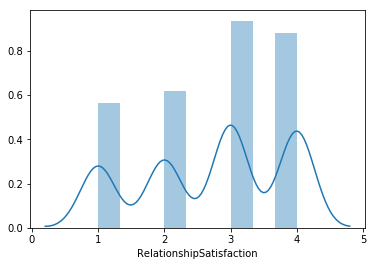

In [16]:
sb.distplot(A.RelationshipSatisfaction)

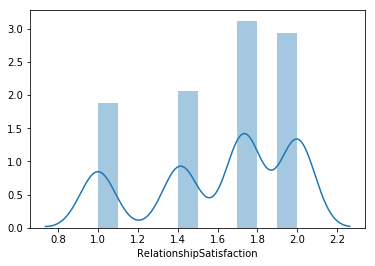

In [17]:
import numpy as np

A['RelationshipSatisfaction']=np.sqrt(A.RelationshipSatisfaction)
sb.distplot(A.RelationshipSatisfaction)
plt.show()

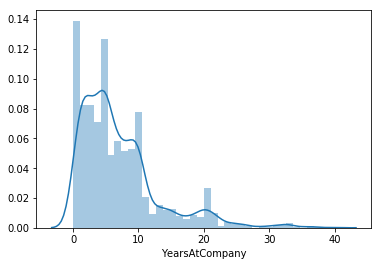

In [18]:
sb.distplot(A.YearsAtCompany)

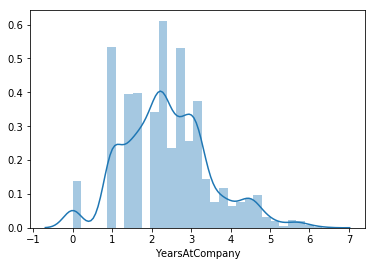

In [19]:
import numpy as np

A['YearsAtCompany']=np.sqrt(A.YearsAtCompany)
sb.distplot(A.YearsAtCompany)
plt.show()

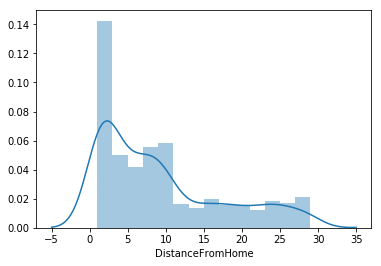

In [20]:
sb.distplot(A.DistanceFromHome)

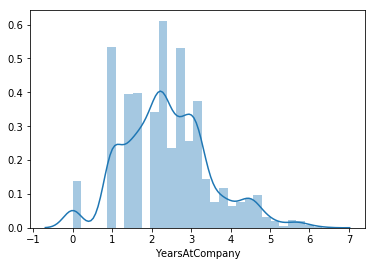

In [21]:
import numpy as np

A['DistanceFromHome']=np.sqrt(A.DistanceFromHome)
sb.distplot(A.YearsAtCompany)
plt.show()

# KDE Plot

In [22]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sb.kdeplot(A.loc[(A['Attrition'] =='No'),var] , color='b',shade=True, label='no Attrition')
    ax=sb.kdeplot(A.loc[(A['Attrition'] =='Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [23]:
con_A = A.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(con_A.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
 'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
      numeric_cols_kdeplot.remove(l)


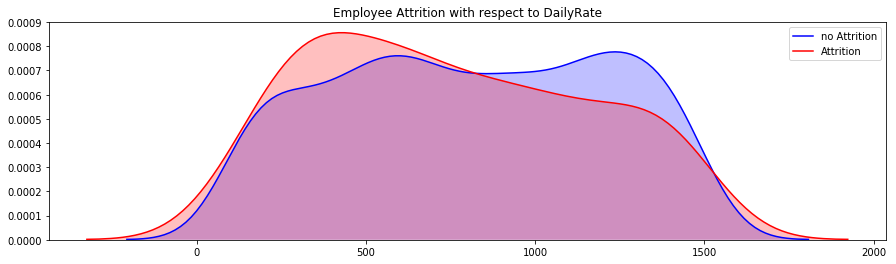

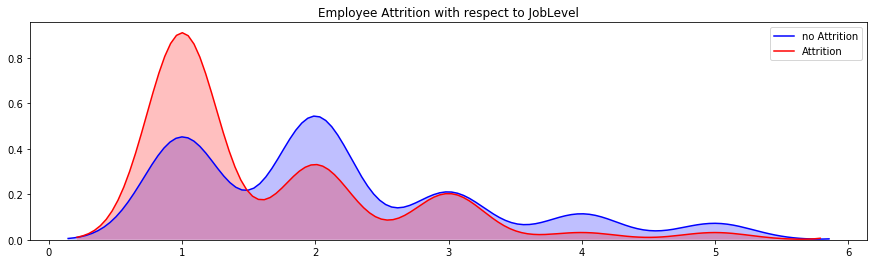

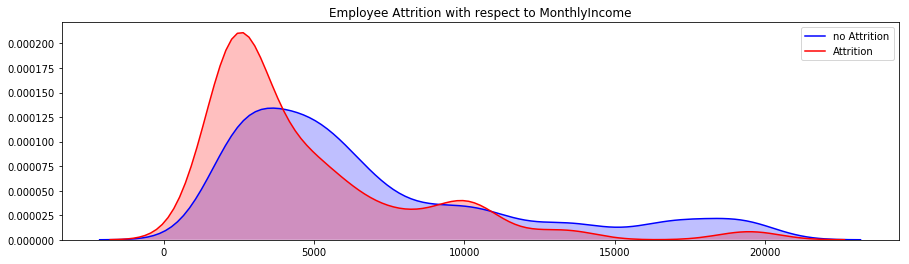

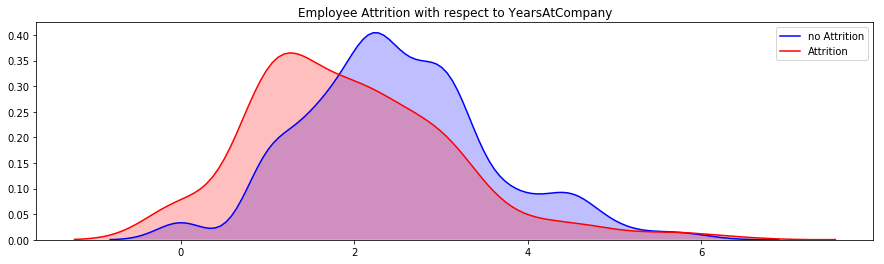

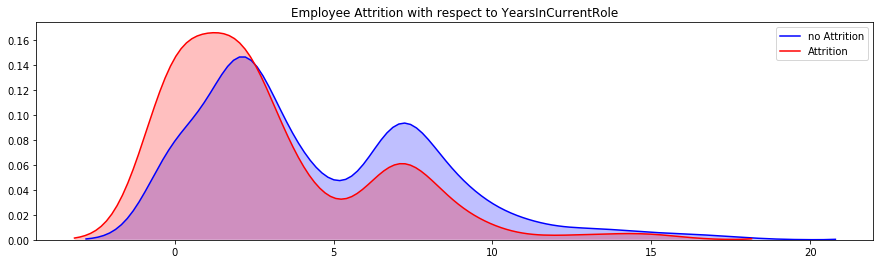

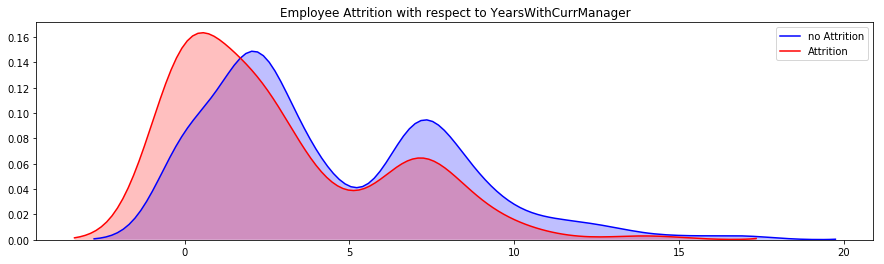

In [24]:
### plot the KDE plot
for n in numeric_cols_kdeplot:
    kdePlot(n)

In [25]:
BarPlot_cloumns=['Age','DistanceFromHome','Education','JobInvolvement','JobLevel','TotalWorkingYears',
 'TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole']


In [26]:
# method to perform barplot
def Bar_plots(var):
    col = pd.crosstab(A[var],A.Attrition)
    col.div(col.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

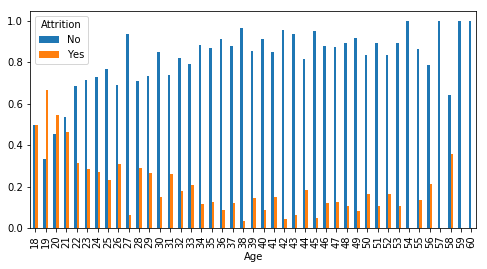

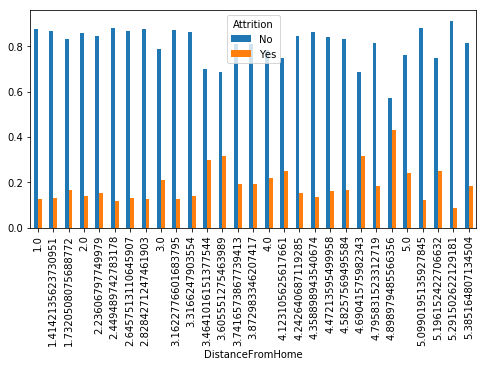

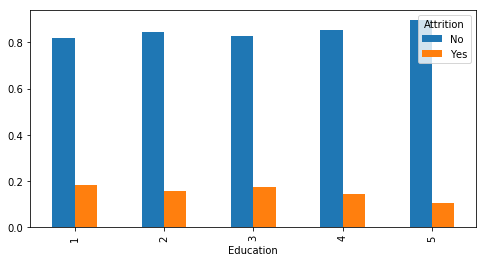

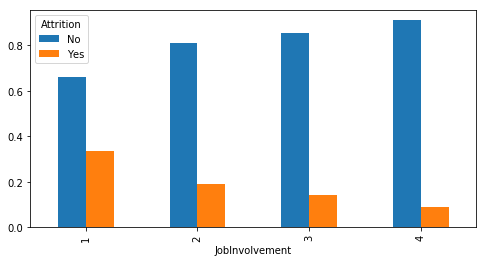

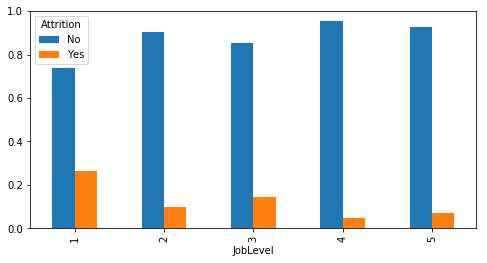

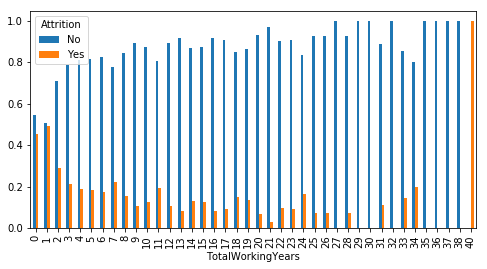

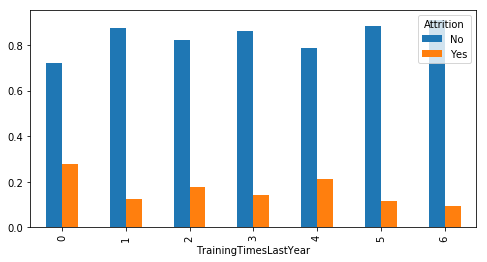

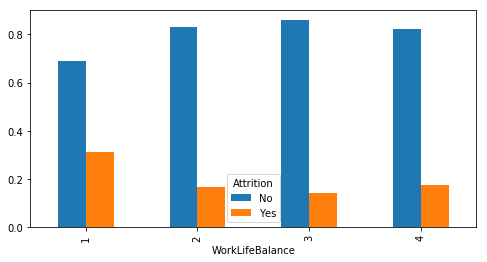

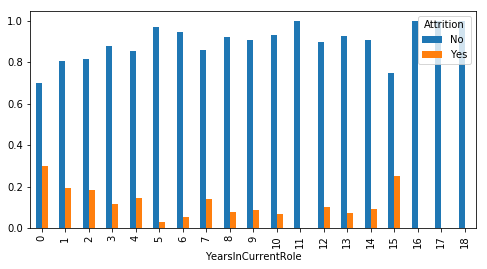

In [27]:
for col in BarPlot_cloumns:
    Bar_plots(col)

# Create dummy variable / encoding 


In [28]:
A.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.000000,2,Life Sciences,1,1,...,1.000000,80,0,8,0,1,2.449490,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,2.828427,1,Life Sciences,1,2,...,2.000000,80,1,10,3,3,3.162278,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,1.414214,2,Other,1,4,...,1.414214,80,0,7,3,3,0.000000,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,1.732051,4,Life Sciences,1,5,...,1.732051,80,0,8,3,3,2.828427,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,1.414214,1,Medical,1,7,...,2.000000,80,1,6,3,3,1.414214,2,2,2


In [29]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [30]:
A.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["Attrition"]=le.fit_transform(A.Attrition)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["BusinessTravel"]=le.fit_transform(A.BusinessTravel)

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["Department"]=le.fit_transform(A.Department)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["EducationField"]=le.fit_transform(A.EducationField)

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["Gender"]=le.fit_transform(A.Gender)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["JobRole"]=le.fit_transform(A.JobRole)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["Over18"]=le.fit_transform(A.Over18)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A["OverTime"]=le.fit_transform(A.OverTime)

In [39]:
A.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1.000000,80,0,8,0,1,2.449490,4,0,5
1,49,0,1,279,1,2.828427,1,1,1,2,...,2.000000,80,1,10,3,3,3.162278,7,1,7
2,37,1,2,1373,1,1.414214,2,4,1,4,...,1.414214,80,0,7,3,3,0.000000,0,0,0
3,33,0,1,1392,1,1.732051,4,1,1,5,...,1.732051,80,0,8,3,3,2.828427,7,3,0
4,27,0,2,591,1,1.414214,1,3,1,7,...,2.000000,80,1,6,3,3,1.414214,2,2,2


# Missing values¶

In [40]:
A.isna().sum()  ### all are zero mens no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Outlier and tretments

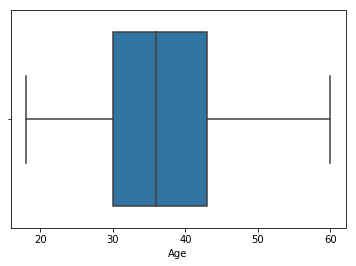

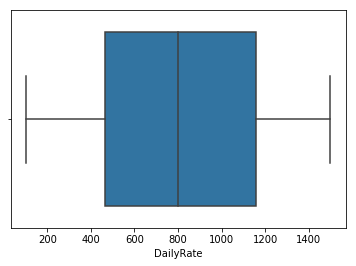

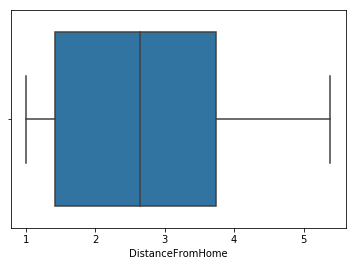

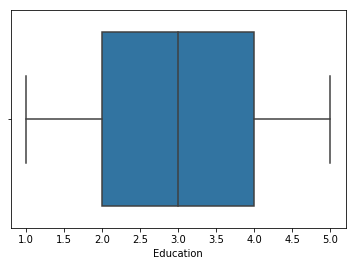

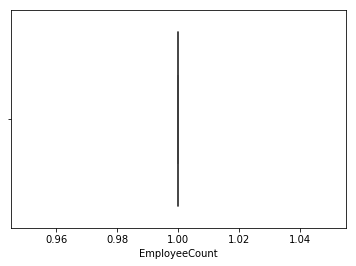

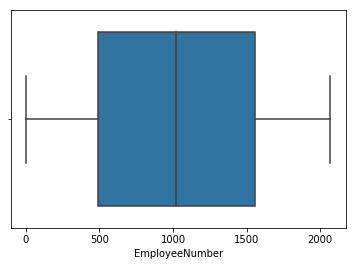

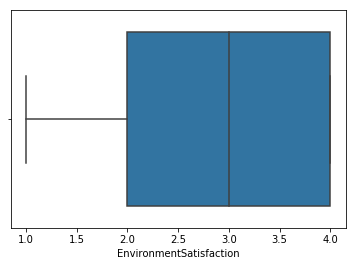

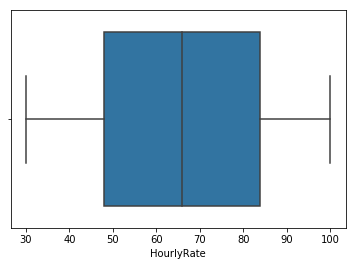

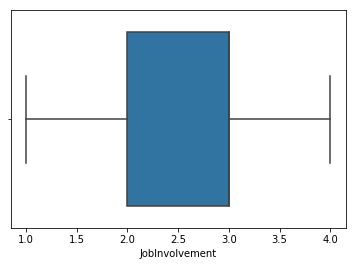

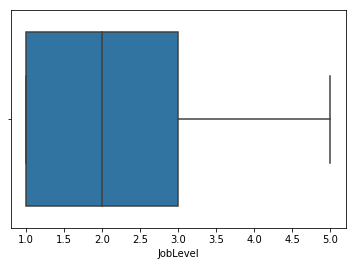

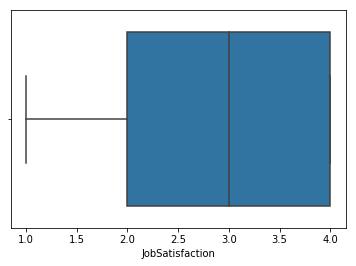

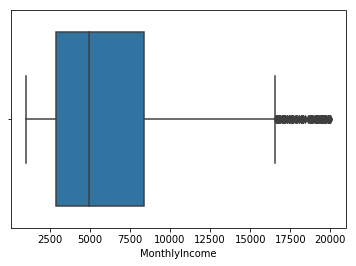

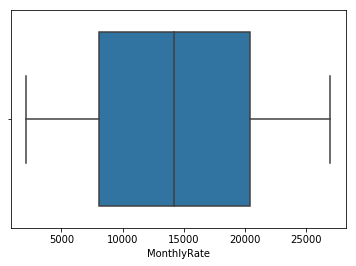

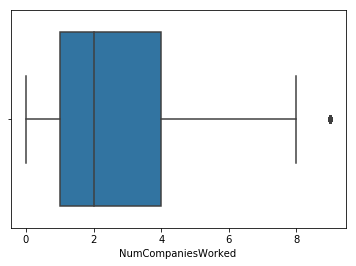

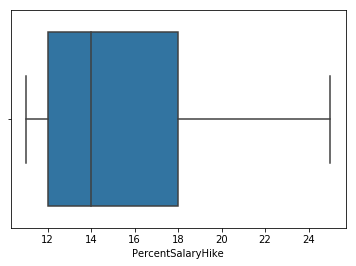

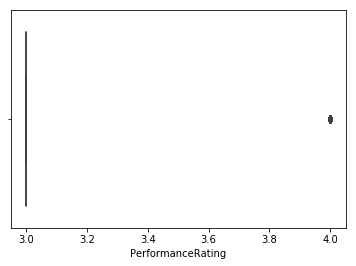

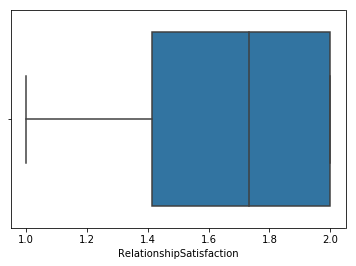

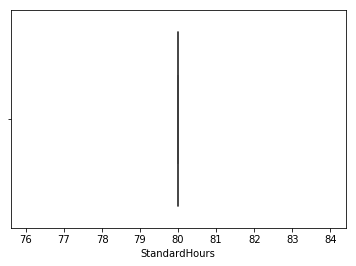

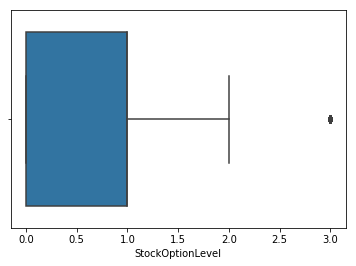

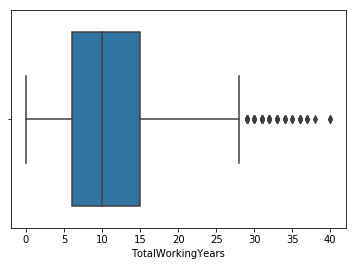

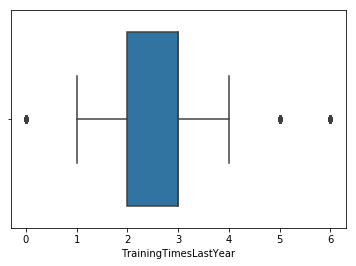

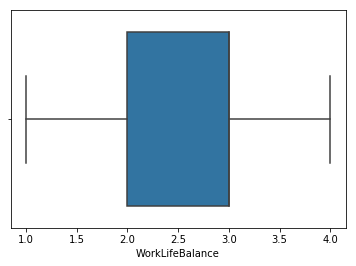

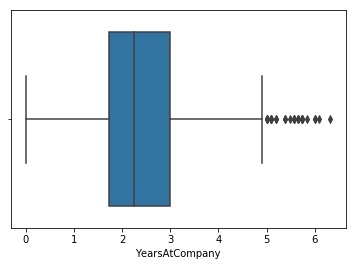

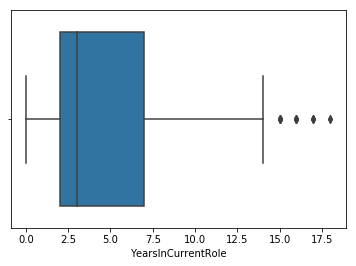

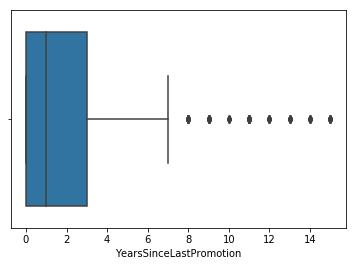

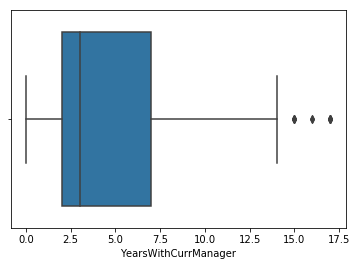

In [41]:
for i in con:
    sb.boxplot(A[i])
    plt.show()

In [42]:
A.shape

(1470, 35)

In [43]:
A.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [44]:
Q1=A['TotalWorkingYears'].quantile(0.25)
Q3=A['TotalWorkingYears'].quantile(0.75) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

6.0
15.0
9.0
-7.5
28.5


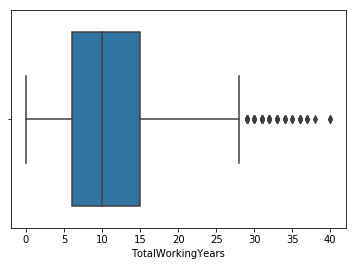

In [45]:
sb.boxplot(A.TotalWorkingYears) 

In [46]:
A.shape

(1470, 35)

In [47]:
Q1=A['MonthlyIncome'].quantile(0.25)
Q3=A['MonthlyIncome'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2911.0
17821.35
14910.349999999999
-19454.524999999998
40186.875


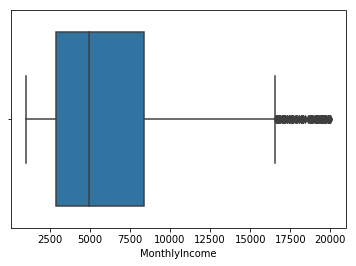

In [48]:
sb.boxplot(A.MonthlyIncome)

In [49]:
Q1=A['TrainingTimesLastYear'].quantile(0.25)
Q3=A['TrainingTimesLastYear'].quantile(0.75) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2.0
3.0
1.0
0.5
4.5


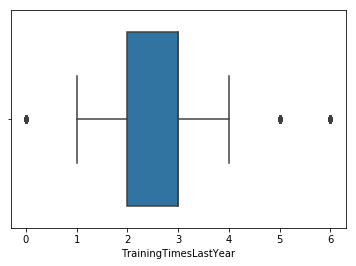

In [50]:
sb.boxplot(A.TrainingTimesLastYear)

In [51]:
Q1=A['YearsAtCompany'].quantile(0.25)
Q3=A['YearsAtCompany'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

1.7320508075688772
4.47213595499958
2.7400851474307024
-2.378076913577176
8.582263676145633


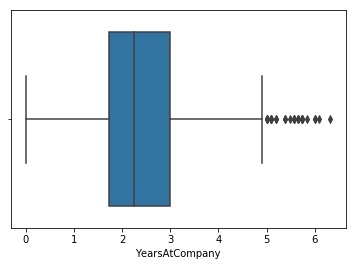

In [52]:
sb.boxplot(A.YearsAtCompany)

In [53]:
Q1=A['MonthlyIncome'].quantile(0.25)
Q3=A['MonthlyIncome'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2911.0
17821.35
14910.349999999999
-19454.524999999998
40186.875


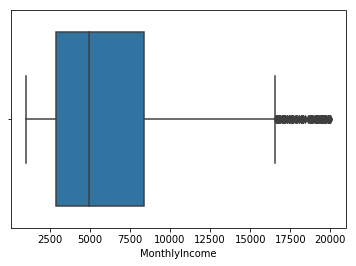

In [54]:
sb.boxplot(A.MonthlyIncome)

In [55]:
Q1=A['MonthlyIncome'].quantile(0.25)
Q3=A['MonthlyIncome'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2911.0
17821.35
14910.349999999999
-19454.524999999998
40186.875


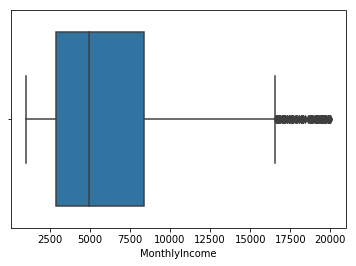

In [56]:
sb.boxplot(A.MonthlyIncome)

In [57]:
Q1=A['MonthlyIncome'].quantile(0.25)
Q3=A['MonthlyIncome'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2911.0
17821.35
14910.349999999999
-19454.524999999998
40186.875


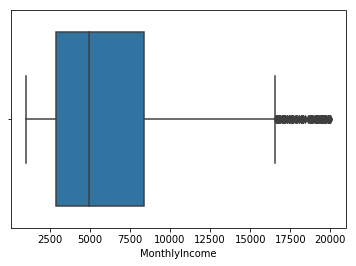

In [58]:
sb.boxplot(A.MonthlyIncome)

In [59]:
Q1=A['MonthlyIncome'].quantile(0.25)
Q3=A['MonthlyIncome'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2911.0
17821.35
14910.349999999999
-19454.524999999998
40186.875


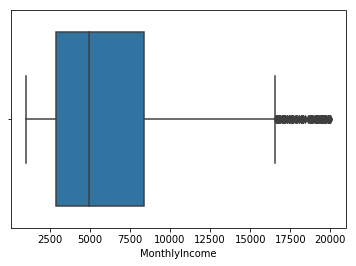

In [60]:
sb.boxplot(A.MonthlyIncome)

In [61]:
Q1=A['MonthlyIncome'].quantile(0.25)
Q3=A['MonthlyIncome'].quantile(0.95) 
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

2911.0
17821.35
14910.349999999999
-19454.524999999998
40186.875


# Adaptive boosting on Attrition data


0.8333333333333334


C:\Users\abhijeet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Container object of 26 artists>

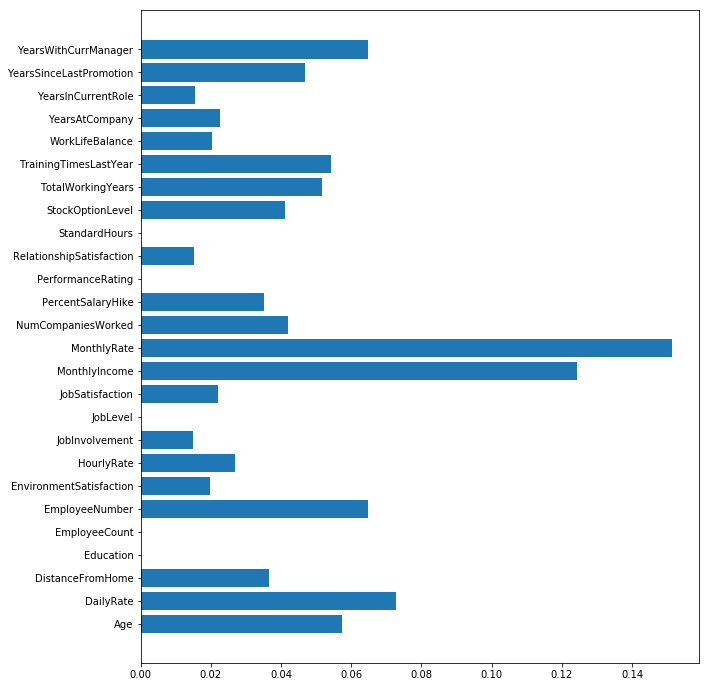

In [68]:
X=A[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]
Y=A[["Attrition"]]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=20)
# estimated_weight is the criteria where we manually can assigt some weight to the observation

model=abc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))

import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(10,12))
plt.barh(X.columns,model.feature_importances_)

In [66]:
### we used the feture important and remove the unwanted columb and get the more accuracy of the model

0.8503401360544217


C:\Users\abhijeet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Container object of 20 artists>

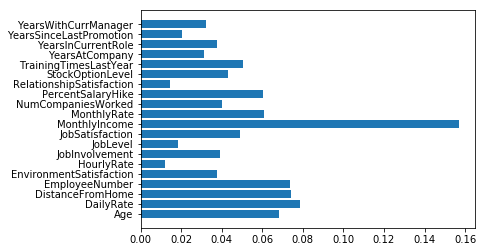

In [69]:
X=A[["Age","DailyRate","DistanceFromHome","EmployeeNumber","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","RelationshipSatisfaction","StockOptionLevel","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]
Y=A[["Attrition"]]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=X.apply(le.fit_transform)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=20)
# estimated_weight is the criteria where we manually can assigt some weight to the observation

model=abc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))

import matplotlib.pyplot as plt
plt.barh(X.columns,model.feature_importances_)